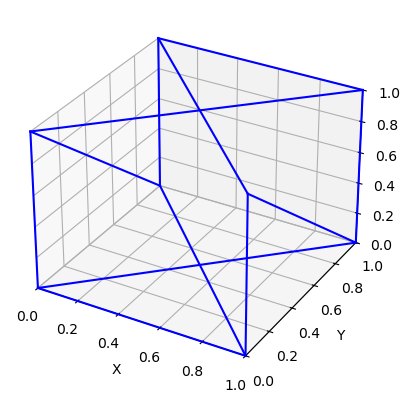

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 设置晶格常数
a = 1  # 立方体晶格的晶格常数

# 创建立方体的8个角点
lattice_points = np.array([
    [0, 0, 0],
    [a, 0, 0],
    [0, a, 0],
    [0, 0, a],
    [a, a, 0],
    [a, 0, a],
    [0, a, a],
    [a, a, a]
])

# 绘制晶格点
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 画出晶格的各条边
for i in range(4):
    ax.plot([lattice_points[i, 0], lattice_points[(i+1)%4, 0]], 
            [lattice_points[i, 1], lattice_points[(i+1)%4, 1]], 
            [lattice_points[i, 2], lattice_points[(i+1)%4, 2]], color='b')
    
    ax.plot([lattice_points[i+4, 0], lattice_points[(i+1)%4+4, 0]], 
            [lattice_points[i+4, 1], lattice_points[(i+1)%4+4, 1]], 
            [lattice_points[i+4, 2], lattice_points[(i+1)%4+4, 2]], color='b')

    ax.plot([lattice_points[i, 0], lattice_points[i+4, 0]], 
            [lattice_points[i, 1], lattice_points[i+4, 1]], 
            [lattice_points[i, 2], lattice_points[i+4, 2]], color='b')

# 设置图形显示
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 设置坐标轴范围
ax.set_xlim([0, a])
ax.set_ylim([0, a])
ax.set_zlim([0, a])

plt.show()


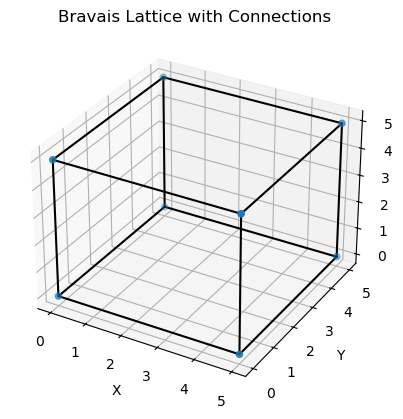

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 输入晶格常数和角度
a, b, c = 5.0, 5.0, 5.0  # 例子中的晶格常数（单位：Å）
alpha, beta, gamma = 120, 90.0, 90.0  # 角度（单位：度）

# 将角度从度转换为弧度
alpha = np.radians(alpha)
beta = np.radians(beta)
gamma = np.radians(gamma)

# 计算晶格矩阵
A = np.array([
    [a, 0, 0],
    [b * np.cos(gamma), b * np.sin(gamma), 0],
    [c * np.cos(beta), c * (np.cos(alpha) - np.cos(beta) * np.cos(gamma)) / np.sin(gamma), 
     c * np.sqrt(1 - np.cos(beta)**2 - (np.cos(alpha) - np.cos(beta) * np.cos(gamma))**2 / np.sin(gamma)**2)]
])

# 获取晶格点（通过重复每个坐标）
points = np.array([[0, 0, 0], [a, 0, 0], [0, b, 0], [0, 0, c], [a, b, 0], [a, 0, c], [0, b, c], [a, b, c]])

# 绘制三维布拉菲格子
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制晶格点
ax.scatter(points[:, 0], points[:, 1], points[:, 2])

# 绘制连接晶格点的线条
# 创建连接点的线
lines = [
    [points[0], points[1]],  # (0,0,0) -> (a,0,0)
    [points[0], points[2]],  # (0,0,0) -> (0,b,0)
    [points[0], points[3]],  # (0,0,0) -> (0,0,c)
    [points[1], points[4]],  # (a,0,0) -> (a,b,0)
    [points[1], points[5]],  # (a,0,0) -> (a,0,c)
    [points[2], points[4]],  # (0,b,0) -> (a,b,0)
    [points[2], points[6]],  # (0,b,0) -> (0,b,c)
    [points[3], points[5]],  # (0,0,c) -> (a,0,c)
    [points[3], points[6]],  # (0,0,c) -> (0,b,c)
    [points[4], points[7]],  # (a,b,0) -> (a,b,c)
    [points[5], points[7]],  # (a,0,c) -> (a,b,c)
    [points[6], points[7]]   # (0,b,c) -> (a,b,c)
]

# 绘制线条
for line in lines:
    ax.plot([line[0][0], line[1][0]], 
            [line[0][1], line[1][1]], 
            [line[0][2], line[1][2]], 'k-')

# 设置轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 设置标题
ax.set_title('Bravais Lattice with Connections')

# 显示图形
plt.show()


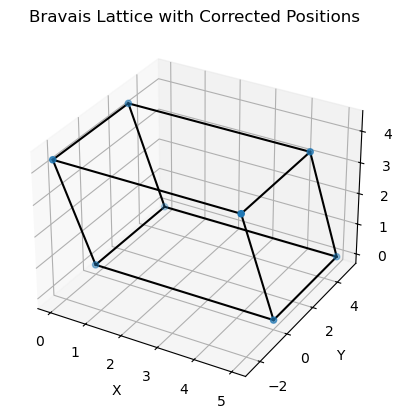

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 输入晶格常数和角度（单位：Å 和度）
a, b, c = 5.0, 5.0, 5.0  # 例子中的晶格常数
alpha, beta, gamma = 120.0, 90.0, 90.0  # 角度（单位：度）

# 将角度从度转换为弧度
alpha = np.radians(alpha)
beta = np.radians(beta)
gamma = np.radians(gamma)

# 计算晶格矩阵（转换为弧度的角度影响晶格点位置）
A = np.array([
    [a, 0, 0],
    [b * np.cos(gamma), b * np.sin(gamma), 0],
    [c * np.cos(beta), 
     c * (np.cos(alpha) - np.cos(beta) * np.cos(gamma)) / np.sin(gamma), 
     c * np.sqrt(1 - np.cos(beta)**2 - (np.cos(alpha) - np.cos(beta) * np.cos(gamma))**2 / np.sin(gamma)**2)]
])

# 生成晶格点，考虑晶格矩阵的影响
points = []
for i in range(2):
    for j in range(2):
        for k in range(2):
            # 使用晶格矩阵A来生成点
            point = i * A[0] + j * A[1] + k * A[2]
            points.append(point)

points = np.array(points)

# 绘制三维布拉菲格子
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制晶格点
ax.scatter(points[:, 0], points[:, 1], points[:, 2])

# 绘制连接晶格点的线条
# 创建连接点的线
lines = [
    [points[0], points[1]],  # (0,0,0) -> (a,0,0)
    [points[0], points[2]],  # (0,0,0) -> (0,b,0)
    [points[0], points[4]],  # (0,0,0) -> (0,0,c)
    [points[1], points[3]],  # (a,0,0) -> (a,b,0)
    [points[1], points[5]],  # (a,0,0) -> (a,0,c)
    [points[2], points[3]],  # (0,b,0) -> (a,b,0)
    [points[2], points[6]],  # (0,b,0) -> (0,b,c)
    [points[4], points[5]],  # (0,0,c) -> (a,0,c)
    [points[4], points[6]],  # (0,0,c) -> (0,b,c)
    [points[5], points[7]],  # (a,0,c) -> (a,b,c)
    [points[6], points[7]],  # (0,b,c) -> (a,b,c)
    [points[3], points[7]]   # (a,b,0) -> (a,b,c)
]

# 绘制线条
for line in lines:
    ax.plot([line[0][0], line[1][0]], 
            [line[0][1], line[1][1]], 
            [line[0][2], line[1][2]], 'k-')

# 设置轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 设置标题
ax.set_title('Bravais Lattice with Corrected Positions')

# 显示图形
plt.show()
